In [ ]:
# 1) Clone & cd
!git clone https://github.com/alonlahav123/DSC291-CLIP-Dissect.git
%cd DSC291-CLIP-Dissect

# # 2) Install PyTorch & torchvision
# !pip install torch torchvision --extra-index-url https://download.pytorch.org/whl/cu117

# 3) Install other deps
!pip install -r requirements.txt

# 3b) install these again (not sure why but this works)
!pip install tokenizer ftfy sentence-transformers==2.2.0

# 4) Download the Broden dataset (images only) using
!bash dlbroden.sh

Cloning into 'DSC291-CLIP-Dissect'...
remote: Enumerating objects: 116, done.
remote: Counting objects: 100% (116/116), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 116 (delta 40), reused 115 (delta 39), pack-reused 0 (from 0)
Receiving objects: 100% (116/116), 15.95 MiB | 18.64 MiB/s, done.
Resolving deltas: 100% (40/40), done.
/content/DSC291-CLIP-Dissect
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.3/35.3 MB 64.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.7/79.7 kB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of transformers to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.2/40.2 kB 3.9 MB/s eta 0:00:00
INFO: pip is still looking at multiple versions of transformers 

In [ ]:
# 5) (Optional) Download Places-365 ResNet-18
# !bash dlzoo_example.sh

In [ ]:
!pwd

/content/DSC291-CLIP-Dissect


In [ ]:
# ⬇️ STEP 0A: Install Kaggle CLI and setup credentials
!pip install -q kaggle

# Upload kaggle.json (API credentials) from your local machine (only once)
from google.colab import files
uploaded = files.upload()  # upload your kaggle.json here

# Create the ~/.kaggle directory and move credentials there
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json  # secure the permissions

# ⬇️ STEP 0B: Download and unzip the IP102 dataset
# !kaggle datasets download -d rtmlhjbn/ip02-dataset -p ./data/ip102 --unzip
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rtlmhjbn/ip02-dataset")

print("Path to dataset files:", path)

Saving kaggle.json to kaggle.json


100%|██████████| 2.94G/2.94G [00:25<00:00, 123MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/rtlmhjbn/ip02-dataset/versions/1


In [ ]:
# # ▶️ Run this cell to upload your local .pkl file into Colab and move it into a “checkpoints” folder.

# from google.colab import files
# import os

# # 1. Prompt to upload the .pkl from your computer
# uploaded = files.upload()

# # 2. Create the “checkpoints” directory if it doesn’t exist already
# os.makedirs("checkpoints", exist_ok=True)

# # 3. Move each uploaded file into checkpoints/, printing confirmation
# for filename in uploaded:
#     print(f"Uploaded file: {filename}")
#     src_path = filename
#     dst_path = os.path.join("checkpoints", filename)
#     os.rename(src_path, dst_path)
#     print(f"Moved → {dst_path}")


In [ ]:
# %%bash
# # 1) choose a single root directory
# ROOT=data/imagenet-test
# mkdir -p "$ROOT"

# # 2) download the 2017 DET “test_new” tarball
# wget --continue \
#   --user='alonlahav123' \
#   --password='4$toWxh785zN9&w' \
#   https://image-net.org/data/ILSVRC/2017/ILSVRC2017_DET_test_new.tar.gz \
#   -O "$ROOT"/ILSVRC2017_DET_test_new.tar.gz

# # 3) extract into the same folder
# tar -xzf "$ROOT"/ILSVRC2017_DET_test_new.tar.gz -C "$ROOT"

# # 4) (optional) remove the .tar.gz to save space
# rm "$ROOT"/ILSVRC2017_DET_test_new.tar.gz

In [ ]:
# 7) This will dissect 5 layers of ResNet-50(ImageNet) using Broden as the
#    probing dataset. Results will be saved in
#    results/resnet50_{datetime}/descriptions.csv.

!python describe_neurons.py

100%|███████████████████████████████████████| 335M/335M [00:08<00:00, 43.3MiB/s]
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100% 97.8M/97.8M [00:00<00:00, 205MB/s]
100% 100/100 [00:02<00:00, 41.37it/s]
100% 317/317 [00:28<00:00, 10.95it/s]
100% 317/317 [00:38<00:00,  8.20it/s]
100% 64/64 [00:00<00:00, 213.03it/s]
torch.Size([64, 20000])
100% 256/256 [00:00<00:00, 283.01it/s]
torch.Size([256, 20000])
100% 512/512 [00:01<00:00, 300.31it/s]
torch.Size([512, 20000])
100% 1024/1024 [00:03<00:00, 300.36it/s]
torch.Size([1024, 20000])
100% 2048/2048 [00:06<00:00, 305.29it/s]
torch.Size([2048, 20000])


## Qualitative comparison

In [ ]:
import os
#virtually move to parent directory
# os.chdir("..")

import torch
import pandas as pd

import matplotlib
from matplotlib import pyplot as plt

import utils
import data_utils
import similarity
from experiments import text_colorings

## Settings

In [ ]:
# Change this to select which figure is plotted
figure = 'fig7b'

settings = {'fig1a': {"target_name":'resnet50', "target_layer": 'layer1', "neurons_to_display": [46, 10, 242, 206]},
            'fig1b': {"target_name":'resnet50', "target_layer": 'layer4', "neurons_to_display": [1203, 1731, 683, 185]},
            'fig6a': {"target_name":'resnet18_places', "target_layer": 'layer4', "neurons_to_display": "NetDissect"},
            'fig6b': {"target_name":'resnet18_places', "target_layer": 'layer4', "neurons_to_display": "CLIP-Dissect"},
            'fig7a': {"target_name":'resnet50', "target_layer": 'layer4', "neurons_to_display": "NetDissect"},
            'fig7b': {"target_name":'resnet50', "target_layer": 'layer4', "neurons_to_display": "CLIP-Dissect"},
            'fig9a': {"target_name":'resnet50', "target_layer": 'layer1', "neurons_to_display": "NetDissect"},
            'fig9b': {"target_name":'resnet50', "target_layer": 'layer1', "neurons_to_display": "CLIP-Dissect"},
           }

target_name = settings[figure]["target_name"]
target_layer = settings[figure]["target_layer"]
neurons_to_display = settings[figure]["neurons_to_display"]

clip_name = 'ViT-B/16'
d_probe = 'imagenet_broden'
concept_set = 'data/20k.txt'
batch_size = 32
device = 'cuda'
pool_mode = 'avg'

save_dir = 'saved_activations'
similarity_fn = similarity.soft_wpmi

## Run CLIP-Dissect

In [ ]:
utils.save_activations(clip_name = clip_name, target_name = target_name, target_layers = [target_layer],
                       d_probe = d_probe, concept_set = concept_set, batch_size = batch_size,
                       device = device, pool_mode=pool_mode, save_dir = save_dir)

100%|██████████| 4702/4702 [02:59<00:00, 26.25it/s]


In [ ]:
save_names = utils.get_save_names(clip_name = clip_name, target_name = target_name,
                                  target_layer = target_layer, d_probe = d_probe,
                                  concept_set = concept_set, pool_mode=pool_mode,
                                  save_dir = save_dir)

target_save_name, clip_save_name, text_save_name = save_names

similarities, target_feats = utils.get_similarity_from_activations(target_save_name, clip_save_name,
                                                             text_save_name, similarity_fn, device=device)

with open(concept_set, 'r') as f:
    words = (f.read()).split('\n')

pil_data = data_utils.get_data(d_probe)

100%|██████████| 2048/2048 [00:06<00:00, 316.28it/s]


torch.Size([2048, 20000])


## Visualize

In [ ]:
top_vals, top_ids = torch.topk(target_feats, k=5, dim=0)

get_color = text_colorings.get_coloring(figure)

name_conversion = {'resnet50':'resnet50_imagenet', 'resnet18_places':'resnet18_places365'}
ood_names = {'resnet50':'p', 'resnet18_places': 'i'}

In [ ]:
# Load Network Dissection results
netdissect_res = pd.read_csv('data/NetDissect_results/{}_{}.csv'.format(name_conversion[target_name],
                                                                       target_layer))
nd_ious = netdissect_res['score'].values
nd_labels = netdissect_res['label'].values

#Load MILAN results
milan_base = pd.read_csv('data/MILAN_results/m_base_{}.csv'.format(name_conversion[target_name]))
if target_name == 'resnet50':
    milan_ood = pd.read_csv('data/MILAN_results/m_places365_{}.csv'.format(name_conversion[target_name]))
elif target_name == 'resnet18_places':
    milan_ood = pd.read_csv('data/MILAN_results/m_imagenet_{}.csv'.format(name_conversion[target_name]))

milan_base = milan_base[milan_base['layer']==target_layer]
milan_base = milan_base.sort_values(by=['unit'])
milan_base = list(milan_base['description'])

milan_ood = milan_ood[milan_ood['layer']==target_layer]
milan_ood = milan_ood.sort_values(by=['unit'])
milan_ood = list(milan_ood['description'])

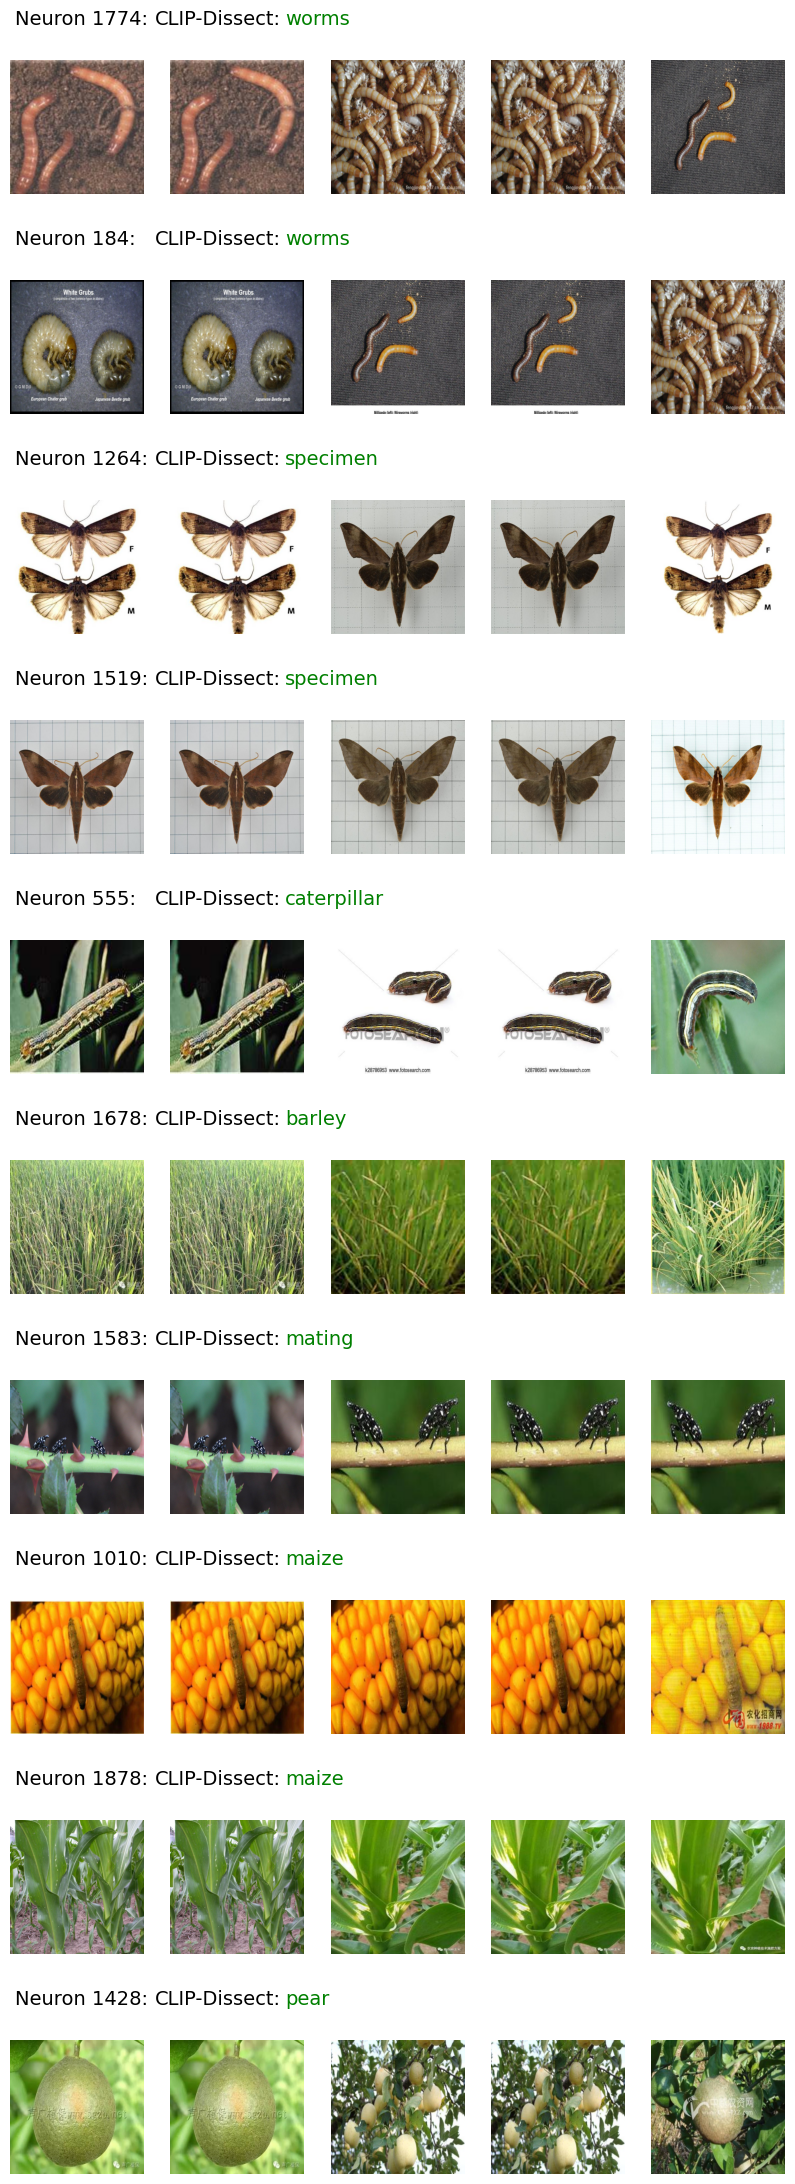

In [ ]:
# Calculate which neurons to show
if type(neurons_to_display)==list:
    ids_to_check = neurons_to_display
if neurons_to_display == "CLIP-Dissect":
    ids_to_check = torch.sort(torch.max(similarities, dim=1)[0], descending=True)[1][0:10]
elif neurons_to_display == "NetDissect":
    ids_to_check = torch.sort(torch.tensor(nd_ious), descending=True)[1][:10]


#plot figures
font_size=14
font = {'size'   : font_size}

matplotlib.rc('font', **font)

fig = plt.figure(figsize=[10, len(ids_to_check)*2.2])
subfigs = fig.subfigures(nrows=len(ids_to_check), ncols=1)
for j, orig_id in enumerate(ids_to_check):
    vals, ids = torch.topk(similarities[orig_id], k=5, largest=True)

    subfig = subfigs[j]
    subfig.text(0.13, 0.96, "Neuron {}:".format(int(orig_id)), size=font_size)
    subfig.text(0.27, 0.96, "CLIP-Dissect:", size=font_size)
    subfig.text(0.4, 0.96, words[int(ids[0])], size=font_size, color=get_color("clip", j))
    # subfig.text(0.53 ,0.96, "NetDissect:", size=font_size)
    # subfig.text(0.65 ,0.96, nd_labels[orig_id], size=font_size, color=get_color("nd", j))

    # subfig.text(0.13, 0.85, "MILAN(b):", size=font_size)
    # subfig.text(0.24, 0.85, milan_base[orig_id], size=font_size, color=get_color("milan_b", j))

    # subfig.text(0.53, 0.85, "MILAN({}):".format(ood_names[target_name]), size=font_size)
    # subfig.text(0.63, 0.85, milan_ood[orig_id], size=font_size, color=get_color("milan_ood", j))
    axs = subfig.subplots(nrows=1, ncols=5)
    for i, top_id in enumerate(top_ids[:, orig_id]):
        im, label = pil_data[top_id]
        im = im.resize([375,375])
        axs[i].imshow(im)
        axs[i].axis('off')
plt.show()